In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# 데이터셋 생성

In [2]:
import os

X = np.empty((2000, 64, 64, 3))
Y = np.empty((2000,))

target = 'Palm'

folders = os.listdir('./images')
folders.remove(target)
folders.remove('Other')

files = os.listdir(f'./images/{target}')
for i in range(1000):
    x = cv2.imread(f"./images/{target}/{files[i]}")
    X[i] = cv2.resize(x, (64, 64))
    Y[i] = 1

files = os.listdir('./images/Other')
for i in range(300):
    x = cv2.imread(f"./images/Other/{files[i]}")
    X[i+1000] = cv2.resize(x, (64, 64))
    Y[i+1000] = 0

for f in range(7):
    files = os.listdir(f'./images/{folders[f]}')
    for i in range(100):
        x = cv2.imread(f"./images/{folders[f]}/{files[i]}")
        X[1300+f*100+i] = cv2.resize(x, (64, 64))
        Y[1300+f*100+i] = 0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [4]:
print(X_train.shape)
print(X_test.shape)
print( y_train.shape)
print(y_test.shape)

(1500, 64, 64, 3)
(500, 64, 64, 3)
(1500,)
(500,)


# 모델 생성

In [5]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(1024, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[
        'accuracy',
    ],
)

In [7]:
modelpath=f"./history/{target.lower()}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=100, verbose='auto', callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 4.1843 - accuracy: 0.4756
Epoch 1: val_loss improved from inf to 0.69661, saving model to ./history\palm.hdf5
12/12 [==============================] - 12s 821ms/step - loss: 4.1843 - accuracy: 0.4756 - val_loss: 0.6966 - val_accuracy: 0.4667
Epoch 2/30


c:\Users\Noah\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - ETA: 0s - loss: 0.7077 - accuracy: 0.5084
Epoch 2: val_loss improved from 0.69661 to 0.69033, saving model to ./history\palm.hdf5
12/12 [==============================] - 9s 773ms/step - loss: 0.7077 - accuracy: 0.5084 - val_loss: 0.6903 - val_accuracy: 0.5280
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5200
Epoch 3: val_loss improved from 0.69033 to 0.68862, saving model to ./history\palm.hdf5
12/12 [==============================] - 9s 743ms/step - loss: 0.6924 - accuracy: 0.5200 - val_loss: 0.6886 - val_accuracy: 0.5360
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.5120
Epoch 4: val_loss improved from 0.68862 to 0.68747, saving model to ./history\palm.hdf5
12/12 [==============================] - 9s 789ms/step - loss: 0.6961 - accuracy: 0.5120 - val_loss: 0.6875 - val_accuracy: 0.6133
Epoch 5/30
12/12 [==============================] - ETA: 0s - loss: 0.68

In [9]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 43ms/step - loss: 0.6030 - accuracy: 0.7960


[0.6030488610267639, 0.7960000038146973]

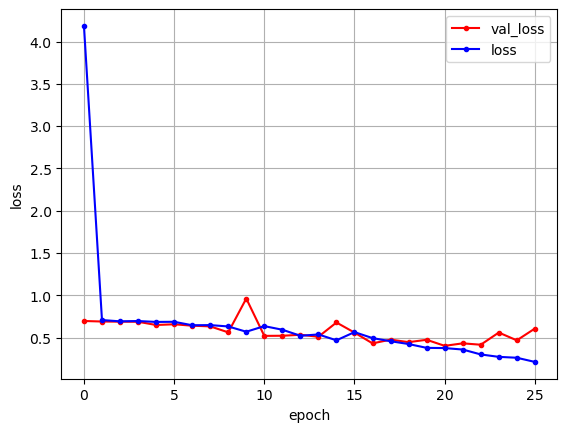

In [10]:
val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c="red", label='val_loss')
plt.plot(x_len, loss, marker='.', c="blue", label='loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

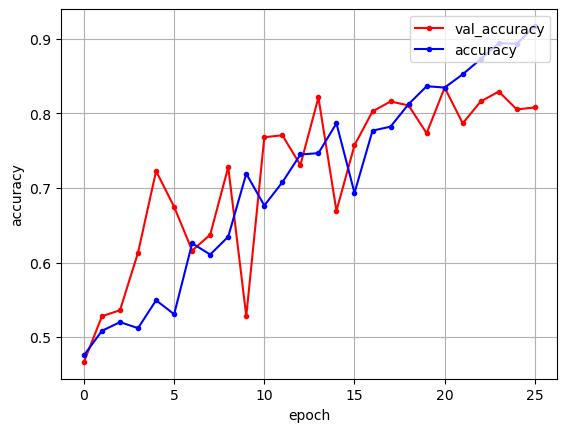

In [11]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

x_len = np.arange(len(accuracy))
plt.plot(x_len, val_accuracy, marker='.', c="red", label='val_accuracy')
plt.plot(x_len, accuracy, marker='.', c="blue", label='accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
model.save(f"./models/{target.lower()}.hdf5")